<a href="https://colab.research.google.com/github/smartshree-ad124/codsoft_-1/blob/main/AIRCCPdownscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install rasterio gdal opencv-python matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 69.0 MB/s eta 0:00:00


Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 23, 'height': 12, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.04491576420597607, 0.0, 76.49154644277725,
       0.0, -0.04491576420597607, 28.92575214864859)}


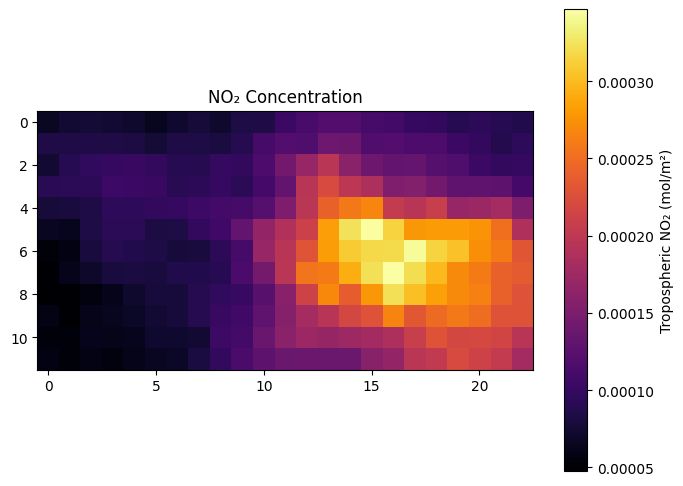

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to your GeoTIFF file in Google Drive
file_path = "/content/drive/My Drive/NO2_Delhi_Jan2024.tif"




# Open the GeoTIFF file
with rasterio.open(file_path) as dataset:
    no2_data = dataset.read(1)  # Read the first band
    no2_meta = dataset.meta  # Get metadata (projection, resolution, etc.)

# Print metadata
print("Metadata:", no2_meta)

# Plot the NO₂ data
plt.figure(figsize=(8, 6))
plt.imshow(no2_data, cmap="inferno", interpolation="nearest")
plt.colorbar(label="Tropospheric NO₂ (mol/m²)")
plt.title("NO₂ Concentration")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving NO2_Delhi_Jan2024.tif to NO2_Delhi_Jan2024.tif


In [ ]:
import rasterio

file_path = "/content/drive/My Drive/no2_data/NO2_Delhi_Jan2024.tif"  # Update the path accordingly

# Open the GeoTIFF file
with rasterio.open(file_path) as dataset:
    no2_data = dataset.read(1)  # Read the first band
    print("File loaded successfully!")


ModuleNotFoundError: No module named 'rasterio'

In [ ]:
# Check Coordinate Reference System (CRS)
print("CRS:", dataset.crs)

# Check Raster Resolution
print("Resolution:", dataset.res)

# Get spatial bounds of the dataset
print("Bounds:", dataset.bounds)

# Get shape of the raster (height x width)
print("Shape:", no2_data.shape)


CRS: EPSG:4326
Resolution: (0.04491576420597607, 0.04491576420597607)
Bounds: BoundingBox(left=76.49154644277725, bottom=28.38676297817688, right=77.5246090195147, top=28.92575214864859)
Shape: (12, 23)


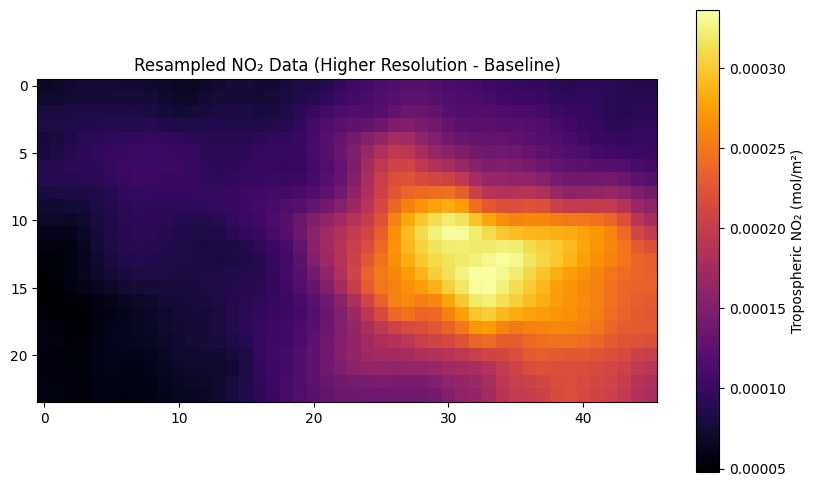

In [ ]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.enums import Resampling

file_path = "/content/drive/My Drive/NO2_Delhi_Jan2024.tif"

# Open the dataset again
dataset = rasterio.open(file_path)

# Read the first band (NO2 data)
no2_data = dataset.read(1)

# Define a scaling factor (e.g., 2x higher resolution)
scale_factor = 2

# Compute new dimensions
new_width = int(no2_data.shape[1] * scale_factor)
new_height = int(no2_data.shape[0] * scale_factor)
new_transform = dataset.transform * dataset.transform.scale(
    (dataset.width / new_width),
    (dataset.height / new_height)
)

# Resample using bilinear interpolation
resampled_no2 = dataset.read(
    1,
    out_shape=(new_height, new_width),
    resampling=Resampling.bilinear
)

# Plot the resampled NO₂ data
plt.figure(figsize=(10, 6))
plt.imshow(resampled_no2, cmap="inferno", interpolation="nearest")
plt.colorbar(label="Tropospheric NO₂ (mol/m²)")
plt.title("Resampled NO₂ Data (Higher Resolution - Baseline)")
plt.show()

# Close the dataset
dataset.close()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/GEE_Exports


no2_data  NO2_Delhi_Jan2024.tif


In [ ]:
# prompt: import os
# print(os.listdir("/content/"))

import os
print(os.listdir("/content/drive/My Drive/GEE_Exports"))


In [ ]:
import os
print(os.listdir("/content/"))


['.config', 'drive', 'sample_data']


In [ ]:
!ls /content/drive/MyDrive


 10th.jpg			 ReadMespringBootReactjs.txt
 22AD124_3SEMFEE.jpeg		 res_shree22ad124.pdf
 ccreportapril.pdf		 resume4.0
 Classroom			'Screenshot 2023-09-07 185402.png'
'Colab Notebooks'		 shreehaasan_codsoftpay.jpg
 Delhi_Elevation_SRTM.tif	'SHREEHAASAN_RES_1304 (1) (5) (2).pdf'
'Delhi_LandCover_2021 (1).tif'	'SHREEHAASAN_RES_1304 (1).docx'
 Delhi_LandCover_2021.tif	 shreehaasan_techm_intern_novdec23.pdf
 DriveHub			'Untitled form.gform'
 GEE_Exports			 Veena
 NO2_Delhi_Jan2024.tif		 workspace2.zip


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Delhi_Meteorological_ERA5.tif to Delhi_Meteorological_ERA5.tif


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt


file_path = "NO2_Delhi_Jan2024.tif"


with rasterio.open(file_path) as dataset:
    no2_data = dataset.read(1)  # Read the first band
    no2_meta = dataset.meta  # Get metadata (projection, resolution, etc.)

# Plot the NO₂ data
plt.figure(figsize=(8, 6))
plt.imshow(no2_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label="NO₂ Concentration")
plt.title("NO₂ Levels - Delhi (Jan 2024)")
plt.show()

ModuleNotFoundError: No module named 'rasterio'

In [ ]:
!pip install rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 41.2 MB/s eta 0:00:00


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define file path (update if needed)
file_path = "/content/drive/my-drive/NO2_Delhi_Jan2024.tif"

# Open the GeoTIFF file
with rasterio.open(file_path) as dataset:
    no2_data = dataset.read(1)  # Read the first band
    no2_meta = dataset.meta  # Get metadata (projection, resolution, etc.)

# Plot the NO₂ data
plt.figure(figsize=(8, 6))
plt.imshow(no2_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label="NO₂ Concentration")
plt.title("NO₂ Levels - Delhi (Jan 2024)")
plt.show()


RasterioIOError: /content/drive/my-drive/NO2_Delhi_Jan2024.tif: No such file or directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = "/content/drive/my-drive/NO2_Delhi_Jan2024.tif"


In [ ]:
!pip install rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 56.0 MB/s eta 0:00:00


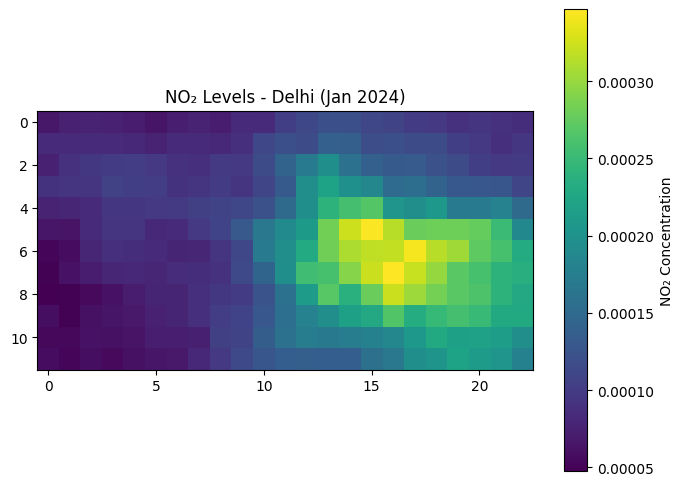

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define file path (update if needed)
file_path = "NO2_Delhi_Jan2024.tif"

# Open the GeoTIFF file
with rasterio.open(file_path) as dataset:
    no2_data = dataset.read(1)  # Read the first band
    no2_meta = dataset.meta  # Get metadata (projection, resolution, etc.)

# Plot the NO₂ data
plt.figure(figsize=(8, 6))
plt.imshow(no2_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label="NO₂ Concentration")
plt.title("NO₂ Levels - Delhi (Jan 2024)")
plt.show()


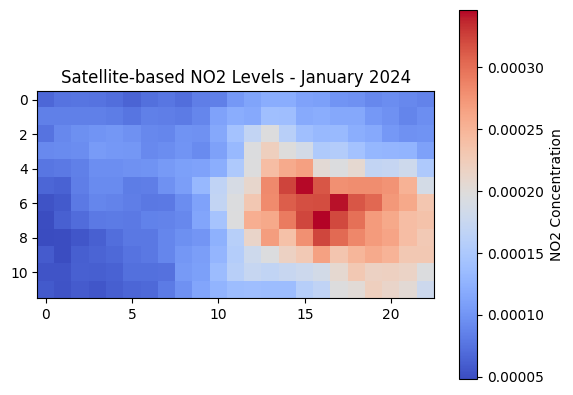

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load satellite NO2 data
file_path = "NO2_Delhi_Jan2024.tif"

with rasterio.open(file_path) as dataset:
    no2_data = dataset.read(1)  # Read the first band
    no2_meta = dataset.meta  # Get metadata (projection, resolution, etc.)

# Display raw satellite NO2 data
plt.imshow(no2_data, cmap='coolwarm')
plt.colorbar(label="NO2 Concentration")
plt.title("Satellite-based NO2 Levels - January 2024")
plt.show()


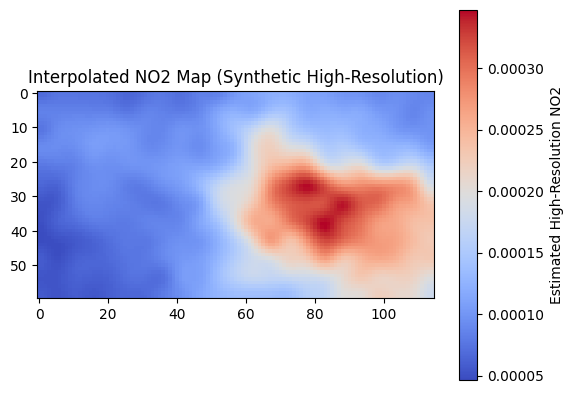

In [ ]:
from scipy.ndimage import zoom

# Increase resolution (scaling factor can be adjusted)
scale_factor = 5
no2_high_res = zoom(no2_data, scale_factor, order=3)  # Order=3 is cubic interpolation

# Display high-resolution interpolated NO2 data
plt.imshow(no2_high_res, cmap='coolwarm')
plt.colorbar(label="Estimated High-Resolution NO2")
plt.title("Interpolated NO2 Map (Synthetic High-Resolution)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Generate synthetic coordinates for ML training
num_samples = 5000  # Number of points to simulate
np.random.seed(42)

# Simulate latitude & longitude (Delhi region)
lats = np.random.uniform(28.40, 28.90, num_samples)
lons = np.random.uniform(76.80, 77.30, num_samples)

# Simulated NO2 values (based on interpolated data)
no2_values = np.random.uniform(no2_data.min(), no2_data.max(), num_samples)

# Create DataFrame
df = pd.DataFrame({"Latitude": lats, "Longitude": lons, "NO2": no2_values})
print(df.head())


    Latitude  Longitude       NO2
0  28.587270  76.996818  0.000159
1  28.875357  77.036718  0.000147
2  28.765997  77.227274  0.000100
3  28.699329  76.970002  0.000229
4  28.478009  77.234825  0.000190


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare features (Latitude & Longitude as spatial features)
X = df[['Latitude', 'Longitude']]
y = df['NO2']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 8.71244013576736e-09


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


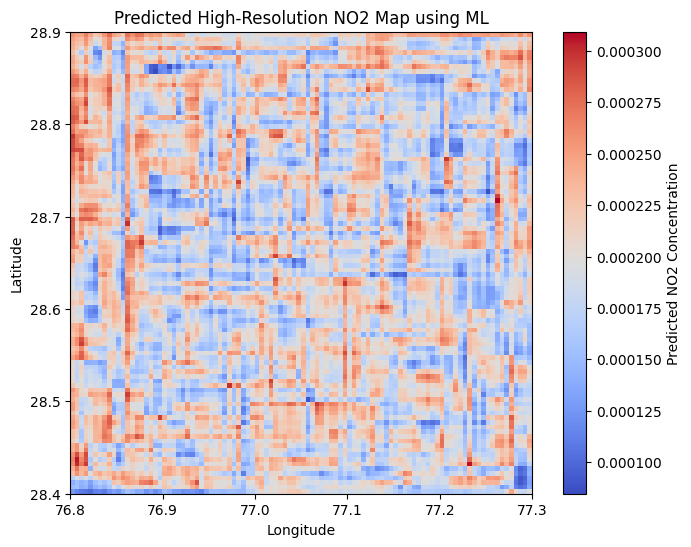

In [ ]:
# Generate a high-resolution grid over Delhi region
grid_lats = np.linspace(28.40, 28.90, 100)
grid_lons = np.linspace(76.80, 77.30, 100)

# Create coordinate pairs
grid_latlon = np.array(np.meshgrid(grid_lats, grid_lons)).T.reshape(-1, 2)

# Predict NO2 levels for each grid point
no2_predictions = model.predict(grid_latlon)

# Reshape predictions to match grid for visualization
no2_grid = no2_predictions.reshape(len(grid_lats), len(grid_lons))

# Plot the high-resolution predicted NO2 map
plt.figure(figsize=(8, 6))
plt.imshow(no2_grid, extent=[76.80, 77.30, 28.40, 28.90], cmap='coolwarm', origin='lower')
plt.colorbar(label="Predicted NO2 Concentration")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Predicted High-Resolution NO2 Map using ML")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'wind_speed.npy'

In [ ]:
%whos


Variable                Type                     Data/Info
----------------------------------------------------------
RandomForestRegressor   ABCMeta                  <class 'sklearn.ensemble.<...>t.RandomForestRegressor'>
X                       DataFrame                       Latitude  Longitud<...>\n[5000 rows x 2 columns]
X_test                  DataFrame                       Latitude  Longitud<...>\n[1000 rows x 2 columns]
X_train                 DataFrame                       Latitude  Longitud<...>\n[4000 rows x 2 columns]
dataset                 DatasetReader            <closed DatasetReader nam<...>hi_Jan2024.tif' mode='r'>
df                      DataFrame                       Latitude  Longitud<...>\n[5000 rows x 3 columns]
file_path               str                      NO2_Delhi_Jan2024.tif
files                   module                   <module 'google.colab.fil<...>s/google/colab/files.py'>
grid_latlon             ndarray                  10000x2: 20000 elems, type 

In [ ]:
print("Meta Height & Width:", meta["height"], meta["width"])
expected_size = meta["height"] * meta["width"]
print("Expected Size:", expected_size, "Actual Size:", no2_predictions.size)


Meta Height & Width: 12 23
Expected Size: 276 Actual Size: 10000


In [ ]:
from skimage.transform import resize


no2_predictions_grid = no2_predictions.reshape(100, 100)


no2_predictions_resized = resize(no2_predictions_grid, (12, 23), anti_aliasing=True)

print("✅ Resized NO₂ Predictions:", no2_predictions_resized.shape)


✅ Resized NO₂ Predictions: (12, 23)


In [ ]:
import rasterio


meta.update({
    "height": no2_predictions_resized.shape[0],
    "width": no2_predictions_resized.shape[1],
    "dtype": "float32"
})


output_file = "Predicted_HighRes_NO2.tif"
with rasterio.open(output_file, "w", **meta) as dst:
    dst.write(no2_predictions_resized.astype("float32"), 1)

print(f"✅ High-Resolution NO₂ Map Saved: {output_file}")


✅ High-Resolution NO₂ Map Saved: Predicted_HighRes_NO2.tif


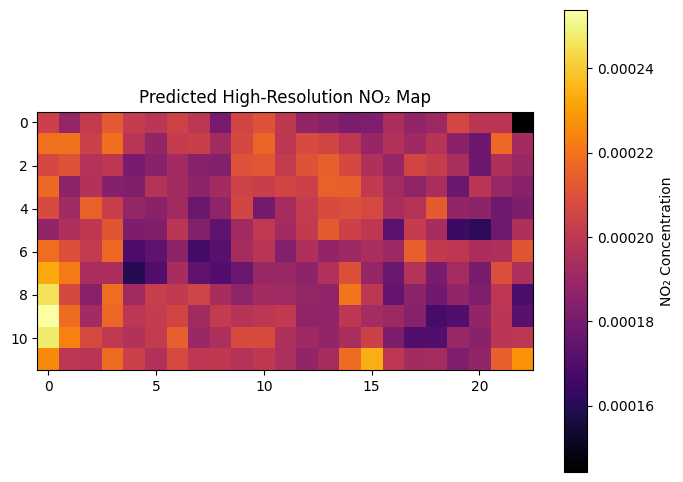

In [ ]:
import rasterio
import matplotlib.pyplot as plt


with rasterio.open("Predicted_HighRes_NO2.tif") as dataset:
    highres_no2 = dataset.read(1)  # Read band 1


plt.figure(figsize=(8, 6))
plt.imshow(highres_no2, cmap="inferno", interpolation="nearest")
plt.colorbar(label="NO₂ Concentration")
plt.title("Predicted High-Resolution NO₂ Map")
plt.show()


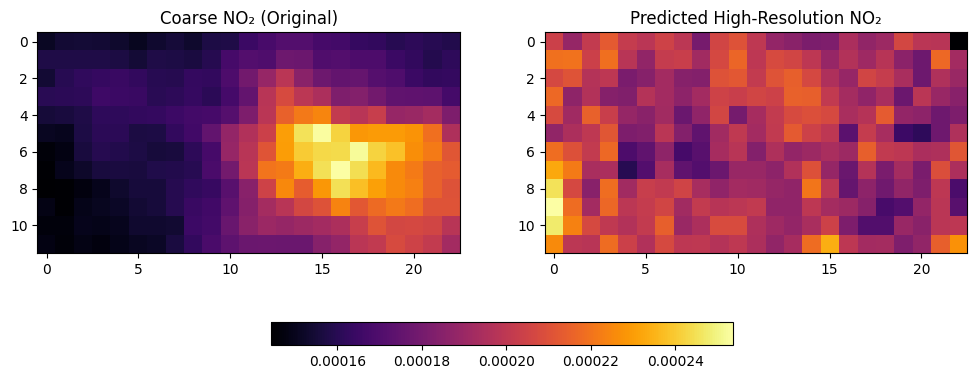

In [ ]:
# Open the original NO₂ data (replace with actual filename)
with rasterio.open("NO2_Delhi_Jan2024.tif") as dataset:
    coarse_no2 = dataset.read(1)

# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(coarse_no2, cmap="inferno", interpolation="nearest")
axs[0].set_title("Coarse NO₂ (Original)")

axs[1].imshow(highres_no2, cmap="inferno", interpolation="nearest")
axs[1].set_title("Predicted High-Resolution NO₂")

plt.colorbar(axs[1].imshow(highres_no2, cmap="inferno"), ax=axs, orientation="horizontal", fraction=0.05)
plt.show()
